In [2]:
import pandas as pd
from sklearn.metrics import log_loss, brier_score_loss

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid", context="paper")

In [3]:
odds_df = pd.read_csv("../../data/backtesting/backtest_odds.csv", parse_dates=["date"]).drop(columns=["sportsbook"])
odds_df["red_odds"] = odds_df["red_odds"].apply(lambda x: 100 / (x + 100) if x > 0 else -x / (-x + 100))
odds_df["blue_odds"] = odds_df["blue_odds"].apply(lambda x: 100 / (x + 100) if x > 0 else -x / (-x + 100))
odds_df["Bovada"] = odds_df["red_odds"] / (odds_df["red_odds"] + odds_df["blue_odds"])
odds_df = odds_df.drop(columns=["red_odds", "blue_odds"])
preds_df = pd.read_csv("../../model_files/lr/predictions.csv")
df = odds_df.merge(preds_df, on=["bout_id"]).rename(columns={"y_pred": "Model"})
df

,bout_id,event_id,date,red_win,Bovada,Model
0,c1356395d6b055d7,46effbd1135423c5,2017-01-15,0.0,0.489879,0.544421
1,ae803440d778a12b,46effbd1135423c5,2017-01-15,0.0,0.328185,0.227241
2,3f7684492c9df05e,46effbd1135423c5,2017-01-15,1.0,0.585987,0.678656
3,53c3565ee1d3411a,46effbd1135423c5,2017-01-15,0.0,0.390764,0.418130
4,8156479490877d08,46effbd1135423c5,2017-01-15,1.0,0.601770,0.727730
...,...,...,...,...,...,...
3955,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,0.0,0.305344,0.379029
3956,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,0.0,0.735516,0.893173
3957,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,1.0,0.772329,0.759408
3958,7521015554088962,72c9c2eadfc3277e,2024-12-14,1.0,0.351079,0.456889


In [4]:
temp = df.loc[(df["date"].dt.year == 2020) & (df["red_win"].notnull())].copy()
bovada_log_loss = log_loss(temp["red_win"], temp["Bovada"])
model_log_loss = log_loss(temp["red_win"], temp["Model"])
bovada_brier_score = brier_score_loss(temp["red_win"], temp["Bovada"])
model_brier_score = brier_score_loss(temp["red_win"], temp["Model"])

print(f"Model Log Loss: {model_log_loss:.6f}")
print(f"Bovada Log Loss: {bovada_log_loss:.6f}")
print(f"Delta: {model_log_loss - bovada_log_loss:.6f}")

print(f"Model Brier Score: {model_brier_score:.6f}")
print(f"Bovada Brier Score: {bovada_brier_score:.6f}")
print(f"Delta: {model_brier_score - bovada_brier_score:.6f}")

Model Log Loss: 0.611094
Bovada Log Loss: 0.617461
Delta: -0.006367
Model Brier Score: 0.211575
Bovada Brier Score: 0.214045
Delta: -0.002470


In [5]:
features = pd.read_pickle("../../data/features.pkl.xz")
features

,id,avg_knockdowns_scored_diff,cumulative_knockdowns_scored_diff,avg_knockdowns_scored_per_second_diff,cumulative_knockdowns_scored_per_second_diff,avg_knockdowns_scored_per_strike_landed_diff,cumulative_knockdowns_scored_per_strike_landed_diff,avg_knockdowns_scored_per_strike_attempted_diff,cumulative_knockdowns_scored_per_strike_attempted_diff,avg_knockdowns_scored_per_significant_strike_landed_diff,...,avg_opp_event_attendance_change_diff,avg_opp_event_attendance_change_diff_diff,avg_opp_avg_event_attendance_change_diff,avg_opp_avg_event_attendance_change_diff_diff,avg_opp_avg_event_occupancy_pct_diff,avg_opp_avg_event_occupancy_pct_diff_diff,avg_opp_event_occupancy_pct_change_diff,avg_opp_event_occupancy_pct_change_diff_diff,avg_opp_avg_event_occupancy_pct_change_diff,avg_opp_avg_event_occupancy_pct_change_diff_diff
0,be38ed9ccfe2ee03,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3611.000000,6580.500000,206.916667,7790.250000,-0.001338,-0.316345,-0.167808,0.596338,-0.008228,0.201749
1,eb1b371dfc37fcdb,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,219bd976b8ca745d,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5791.250000,0.000000,2043.861111,-10063.500000,-0.097682,-0.516345,-0.102990,-0.649139,0.073671,-0.509056
3,af178adff964d854,0.200000,1,0.000313,0.000430,0.002247,0.004386,0.001639,0.003115,0.004651,...,-5569.000000,0.000000,0.000000,0.000000,-0.237066,0.000000,0.000000,0.000000,0.000000,0.000000
4,920194911d727a38,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-4205.666667,0.000000,-0.112834,0.000000,-0.346601,0.000000,0.080951,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,5238f6470d0557fb,0.250000,4,0.001888,0.001181,0.015227,0.010821,0.006283,0.003462,0.015179,...,-4734.666667,11243.000000,722.184292,-1511.853896,-0.202461,-0.584005,0.000000,0.000000,0.007550,0.173006
7072,7b1bc4ff776f12c1,-0.085714,-3,-0.001594,-0.000143,-0.004453,0.000881,-0.003147,0.000704,0.006262,...,-18745.000000,0.000000,82.594036,4943.723440,0.039104,0.251747,-0.224510,0.421001,0.035729,0.306498
7073,1a635a5e4551e7d5,-0.142857,-1,-0.001952,-0.000514,-0.023014,-0.007278,-0.010774,-0.004009,-0.028357,...,-8795.333333,-1100.500000,-3269.043056,20082.425000,0.167921,-0.258702,-0.320822,0.585316,-0.161427,0.579691
7074,7521015554088962,0.175000,7,0.000810,0.000208,0.010541,0.003426,0.005460,0.001763,0.010358,...,3649.085714,-4911.654135,1349.485978,1308.150105,0.138067,0.222074,-0.297118,0.372520,0.084494,0.042074


In [6]:
# features["is_ppv"]
ppv_bout_ids = features.loc[features["is_ppv"] == 1, "id"].tolist()

temp = df.loc[(df["bout_id"].isin(ppv_bout_ids)) & (df["red_win"].notnull())].copy()
model_log_loss = log_loss(temp["red_win"], temp["Model"])
bovada_log_loss = log_loss(temp["red_win"], temp["Bovada"])
model_brier_score = brier_score_loss(temp["red_win"], temp["Model"])
bovada_brier_score = brier_score_loss(temp["red_win"], temp["Bovada"])

print(f"Model Log Loss (PPV): {model_log_loss:.6f}")
print(f"Bovada Log Loss (PPV): {bovada_log_loss:.6f}")
print(f"Delta: {model_log_loss - bovada_log_loss:.6f}")
print(f"Model Brier Score (PPV): {model_brier_score:.6f}")
print(f"Bovada Brier Score (PPV): {bovada_brier_score:.6f}")
print(f"Delta: {model_brier_score - bovada_brier_score:.6f}")

Model Log Loss (PPV): 0.593012
Bovada Log Loss (PPV): 0.596247
Delta: -0.003235
Model Brier Score (PPV): 0.203459
Bovada Brier Score (PPV): 0.204517
Delta: -0.001057


In [7]:
# features["is_female"]
female_bout_ids = features.loc[features["is_female"] == 0, "id"].tolist()

temp = df.loc[(df["bout_id"].isin(female_bout_ids)) & (df["red_win"].notnull())].copy()
model_log_loss = log_loss(temp["red_win"], temp["Model"])
bovada_log_loss = log_loss(temp["red_win"], temp["Bovada"])
model_brier_score = brier_score_loss(temp["red_win"], temp["Model"])
bovada_brier_score = brier_score_loss(temp["red_win"], temp["Bovada"])

print(f"Model Log Loss: {model_log_loss:.6f}")
print(f"Bovada Log Loss: {bovada_log_loss:.6f}")
print(f"Delta: {model_log_loss - bovada_log_loss:.6f}")
print(f"Model Brier Score: {model_brier_score:.6f}")
print(f"Bovada Brier Score: {bovada_brier_score:.6f}")
print(f"Delta: {model_brier_score - bovada_brier_score:.6f}")

Model Log Loss: 0.603392
Bovada Log Loss: 0.606017
Delta: -0.002625
Model Brier Score: 0.208329
Bovada Brier Score: 0.209354
Delta: -0.001025


In [8]:
import os
import sqlite3

db_path = os.path.join(os.path.dirname("__file__"), "..", "..", "data", "ufc.db")

In [9]:
query = """
SELECT id FROM ufcstats_bouts WHERE weight_class = 'Catch Weight'
"""

with sqlite3.connect(db_path) as conn:
    query_res = pd.read_sql_query(query, conn)
weight_class_bout_ids = query_res["id"].tolist()

temp = df.loc[(df["bout_id"].isin(weight_class_bout_ids)) & (df["red_win"].notnull())].copy()
model_log_loss = log_loss(temp["red_win"], temp["Model"])
bovada_log_loss = log_loss(temp["red_win"], temp["Bovada"])
model_brier_score = brier_score_loss(temp["red_win"], temp["Model"])
bovada_brier_score = brier_score_loss(temp["red_win"], temp["Bovada"])

print(f"Model Log Loss: {model_log_loss:.6f}")
print(f"Bovada Log Loss: {bovada_log_loss:.6f}")
print(f"Delta: {model_log_loss - bovada_log_loss:.6f}")
print(f"Model Brier Score: {model_brier_score:.6f}")
print(f"Bovada Brier Score: {bovada_brier_score:.6f}")
print(f"Delta: {model_brier_score - bovada_brier_score:.6f}")

Model Log Loss: 0.579667
Bovada Log Loss: 0.581412
Delta: -0.001745
Model Brier Score: 0.194415
Bovada Brier Score: 0.200654
Delta: -0.006239


In [10]:
query = """
WITH cte1 AS (
    SELECT fighter_id, t1.'order', bout_id FROM ufcstats_fighter_histories t1
    INNER JOIN bout_mapping t2 ON t1.bout_id = t2.ufcstats_id
),
cte2 AS (
    SELECT fighter_id, bout_id, ROW_NUMBER() OVER (PARTITION BY fighter_id ORDER BY t1.'order') AS ufc_order FROM cte1 t1
),
cte3 AS (
    SELECT
        id,
        t3.ufc_order AS red_ufc_order,
        t4.ufc_order AS blue_ufc_order
    FROM ufcstats_bouts t1
    INNER JOIN bout_mapping t2 ON t1.id = t2.ufcstats_id
    LEFT JOIN cte2 t3 ON t1.id = t3.bout_id AND t1.red_fighter_id = t3.fighter_id
    LEFT JOIN cte2 t4 ON t1.id = t4.bout_id AND t1.blue_fighter_id = t4.fighter_id
)
SELECT id FROM cte3 WHERE
    red_ufc_order = 1 AND blue_ufc_order = 1
"""

with sqlite3.connect(db_path) as conn:
    query_res = pd.read_sql_query(query, conn)
exp_level_bout_ids = query_res["id"].tolist()

temp = df.loc[(df["bout_id"].isin(exp_level_bout_ids)) & (df["red_win"].notnull())].copy()
model_log_loss = log_loss(temp["red_win"], temp["Model"])
bovada_log_loss = log_loss(temp["red_win"], temp["Bovada"])
model_brier_score = brier_score_loss(temp["red_win"], temp["Model"])
bovada_brier_score = brier_score_loss(temp["red_win"], temp["Bovada"])

print(f"Model Log Loss: {model_log_loss:.6f}")
print(f"Bovada Log Loss: {bovada_log_loss:.6f}")
print(f"Delta: {model_log_loss - bovada_log_loss:.6f}")
print(f"Model Brier Score: {model_brier_score:.6f}")
print(f"Bovada Brier Score: {bovada_brier_score:.6f}")
print(f"Delta: {model_brier_score - bovada_brier_score:.6f}")

Model Log Loss: 0.607946
Bovada Log Loss: 0.579237
Delta: 0.028709
Model Brier Score: 0.210271
Bovada Brier Score: 0.196018
Delta: 0.014253


In [11]:
df

,bout_id,event_id,date,red_win,Bovada,Model
0,c1356395d6b055d7,46effbd1135423c5,2017-01-15,0.0,0.489879,0.544421
1,ae803440d778a12b,46effbd1135423c5,2017-01-15,0.0,0.328185,0.227241
2,3f7684492c9df05e,46effbd1135423c5,2017-01-15,1.0,0.585987,0.678656
3,53c3565ee1d3411a,46effbd1135423c5,2017-01-15,0.0,0.390764,0.418130
4,8156479490877d08,46effbd1135423c5,2017-01-15,1.0,0.601770,0.727730
...,...,...,...,...,...,...
3955,5238f6470d0557fb,72c9c2eadfc3277e,2024-12-14,0.0,0.305344,0.379029
3956,7b1bc4ff776f12c1,72c9c2eadfc3277e,2024-12-14,0.0,0.735516,0.893173
3957,1a635a5e4551e7d5,72c9c2eadfc3277e,2024-12-14,1.0,0.772329,0.759408
3958,7521015554088962,72c9c2eadfc3277e,2024-12-14,1.0,0.351079,0.456889


In [12]:
df_ppv = df.merge(features[["id", "is_ppv"]], left_on="bout_id", right_on="id", how="left").drop(columns=["id"])
df_ppv = df_ppv[["bout_id", "date", "is_ppv"]].drop_duplicates().copy()
df_ppv["year"] = df_ppv["date"].dt.year
df_ppv = df_ppv.drop(columns=["date"])
df_ppv = df_ppv.rename(columns={"is_ppv": "Event Type"})
df_ppv["Event Type"] = df_ppv["Event Type"].replace({1: "Pay-Per-View", 0: "Non-PPV"})
df_ppv

,bout_id,Event Type,year
0,c1356395d6b055d7,Non-PPV,2017
1,ae803440d778a12b,Non-PPV,2017
2,3f7684492c9df05e,Non-PPV,2017
3,53c3565ee1d3411a,Non-PPV,2017
4,8156479490877d08,Non-PPV,2017
...,...,...,...
3955,5238f6470d0557fb,Non-PPV,2024
3956,7b1bc4ff776f12c1,Non-PPV,2024
3957,1a635a5e4551e7d5,Non-PPV,2024
3958,7521015554088962,Non-PPV,2024


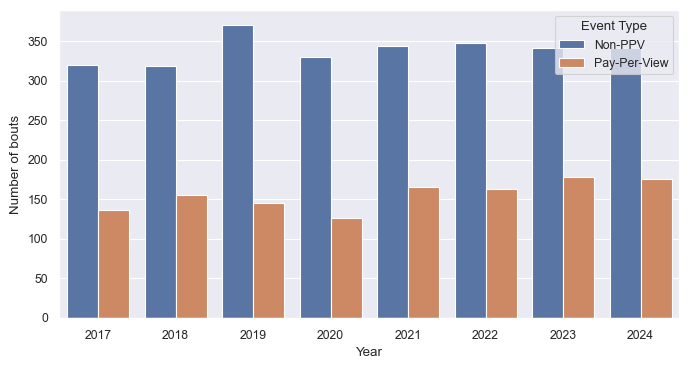

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_ppv, x="year", hue="Event Type", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of bouts")
plt.show()

In [14]:
df_gender = df.merge(features[["id", "is_female"]], left_on="bout_id", right_on="id", how="left").drop(columns=["id"])
df_gender = df_gender[["bout_id", "date", "is_female"]].drop_duplicates().copy()
df_gender["year"] = df_gender["date"].dt.year
df_gender = df_gender.drop(columns=["date"])
df_gender = df_gender.rename(columns={"is_female": "Gender"})
df_gender["Gender"] = df_gender["Gender"].replace({1: "Female", 0: "Male"})
df_gender

,bout_id,Gender,year
0,c1356395d6b055d7,Male,2017
1,ae803440d778a12b,Male,2017
2,3f7684492c9df05e,Male,2017
3,53c3565ee1d3411a,Female,2017
4,8156479490877d08,Male,2017
...,...,...,...
3955,5238f6470d0557fb,Male,2024
3956,7b1bc4ff776f12c1,Male,2024
3957,1a635a5e4551e7d5,Male,2024
3958,7521015554088962,Male,2024


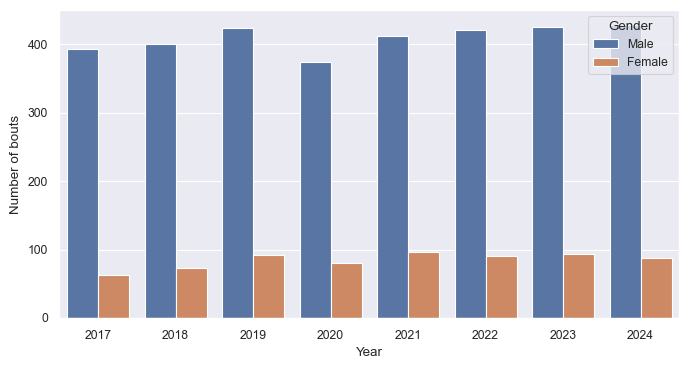

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_gender, x="year", hue="Gender", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of bouts")
plt.show()

In [16]:
query = """
WITH cte1 AS (
    SELECT fighter_id, t1.'order', bout_id FROM ufcstats_fighter_histories t1
    INNER JOIN bout_mapping t2 ON t1.bout_id = t2.ufcstats_id
),
cte2 AS (
    SELECT fighter_id, bout_id, ROW_NUMBER() OVER (PARTITION BY fighter_id ORDER BY t1.'order') AS ufc_order FROM cte1 t1
),
cte3 AS (
    SELECT
        id,
        t3.ufc_order AS red_ufc_order,
        t4.ufc_order AS blue_ufc_order
    FROM ufcstats_bouts t1
    INNER JOIN bout_mapping t2 ON t1.id = t2.ufcstats_id
    LEFT JOIN cte2 t3 ON t1.id = t3.bout_id AND t1.red_fighter_id = t3.fighter_id
    LEFT JOIN cte2 t4 ON t1.id = t4.bout_id AND t1.blue_fighter_id = t4.fighter_id
)
SELECT
    id,
    CASE WHEN red_ufc_order = 1 OR blue_ufc_order = 1 THEN 1 ELSE 0 END AS has_debut
FROM cte3
"""

with sqlite3.connect(db_path) as conn:
    query_res = pd.read_sql_query(query, conn)
df_debut = df.merge(query_res, left_on="bout_id", right_on="id", how="left").drop(columns=["id"])
df_debut = df_debut[["bout_id", "date", "has_debut"]].drop_duplicates().copy()
df_debut["year"] = df_debut["date"].dt.year
df_debut = df_debut.drop(columns=["date"])
df_debut = df_debut.rename(columns={"has_debut": "At least 1 fighter debuting?"})
df_debut["At least 1 fighter debuting?"] = df_debut["At least 1 fighter debuting?"].replace({1: "Yes", 0: "No"})
df_debut

,bout_id,At least 1 fighter debuting?,year
0,c1356395d6b055d7,No,2017
1,ae803440d778a12b,No,2017
2,3f7684492c9df05e,No,2017
3,53c3565ee1d3411a,No,2017
4,8156479490877d08,No,2017
...,...,...,...
3955,5238f6470d0557fb,No,2024
3956,7b1bc4ff776f12c1,No,2024
3957,1a635a5e4551e7d5,No,2024
3958,7521015554088962,No,2024


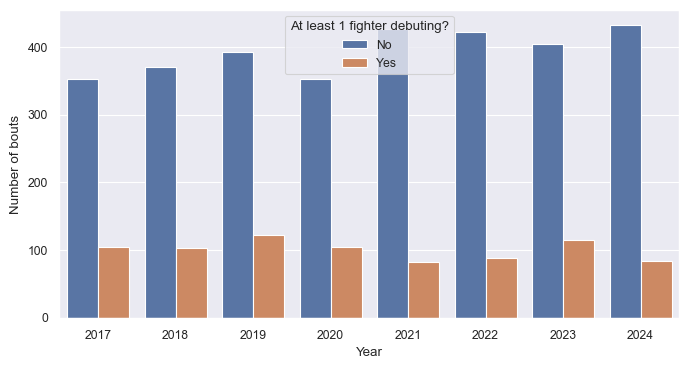

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.countplot(data=df_debut, x="year", hue="At least 1 fighter debuting?", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Number of bouts")
plt.show()